# Raszterizálás

Képek manipulálására sok módszer létezik, ebben az esetben a viszonylag egyszerű reszterizálást fogjuk kreatívan felhasználni.

<b>Forrás: </b>{cite:p}`rodenbroeker`

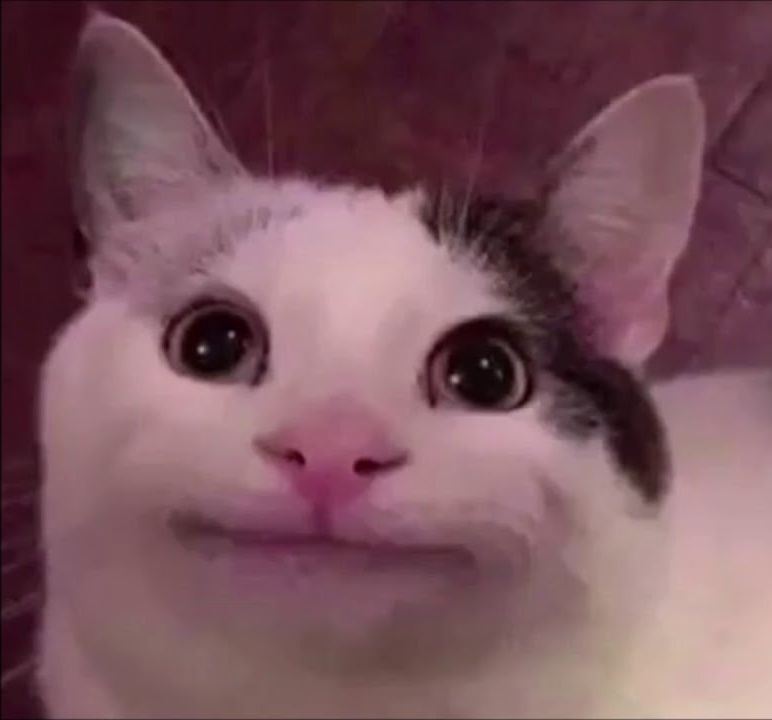

In [1]:
from PIL import Image, ImageDraw
import random

img = Image.open("test_1.png")
img_width = img.width
img_height = img.height
tile_size = 20
display(img)

In [2]:
raster_img = Image.new("RGB", (img_width, img_height), color="white")
raster_draw = ImageDraw.Draw(raster_img)

In [3]:
def avg_grey(image, box):
    area = image.crop(box)
    pixels = area.load()
    width, height = area.size
    r_total, g_total, b_total = 0, 0, 0
    num_pixels = width * height

    for y in range(height):
        for x in range(width):
            r, g, b = pixels[x, y]
            r_total += r
            g_total += g
            b_total += b

    avg_r = r_total // num_pixels
    avg_g = g_total // num_pixels
    avg_b = b_total // num_pixels

    grey = int((avg_r + avg_g + avg_b) / 3)

    return (grey, grey, grey)

In [4]:
avg_grey(img, (100, 100, 200, 200))

(106, 106, 106)

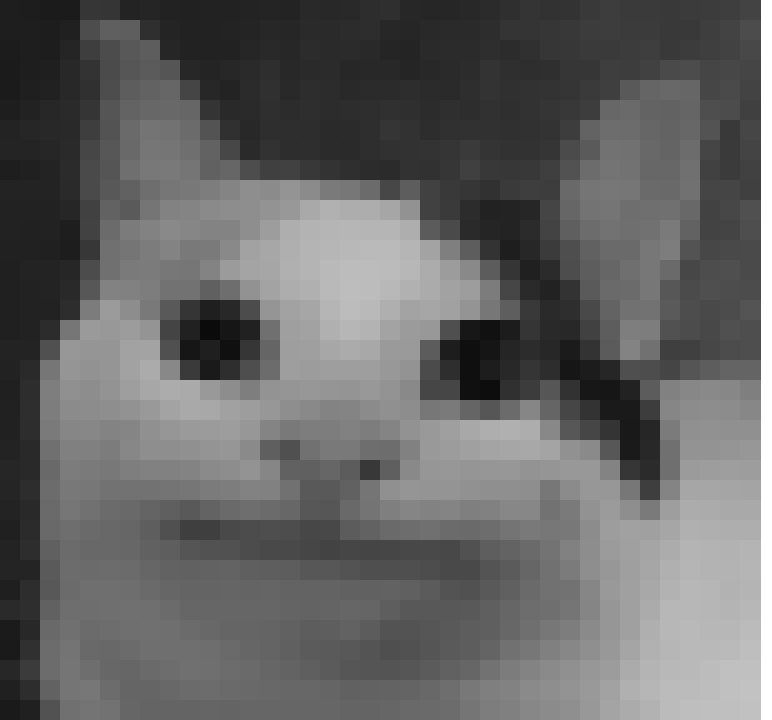

In [5]:
for x in range(int(img_width / tile_size)):
    for y in range(int(img_height / tile_size)):
        x0 = x * tile_size
        y0 = y * tile_size
        x1 = x * tile_size + tile_size
        y1 = y * tile_size + tile_size
        color = avg_grey(img, (x0, y0, x1, y1))
        raster_draw.rectangle(xy=(x0, y0, x1, y1), fill=color)

display(raster_img)

In [6]:
def resetImage(width, height, bg):
    raster_draw.rectangle([0, 0, width, height], fill=bg)

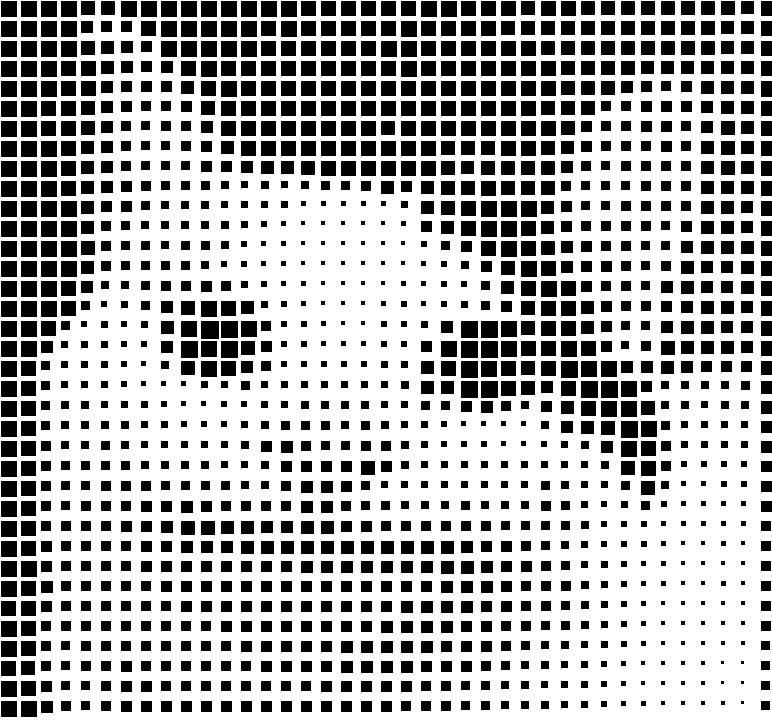

In [7]:
resetImage(img_width, img_height, "white")

for x in range(0, img_width, tile_size):
    for y in range(0, img_height, tile_size):
        x0 = x
        y0 = y
        x1 = x + tile_size
        y1 = y + tile_size
        color = avg_grey(img, (x0, y0, x1, y1))
        z = color[1]
        factor = 1 - z / 255
        x2 = x + (tile_size * factor)
        y2 = y + (tile_size * factor)
        raster_draw.rectangle(xy=(x0, y0, x2, y2), outline="white", fill="black")

display(raster_img)

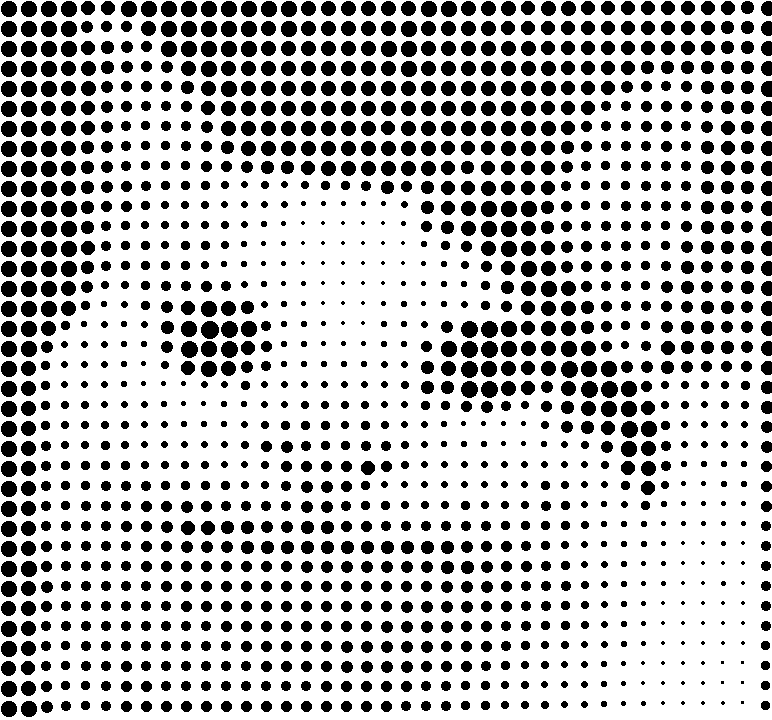

In [8]:
resetImage(img_width, img_height, "white")

for x in range(0, img_width, tile_size):
    for y in range(0, img_height, tile_size):
        x0 = x
        y0 = y
        x1 = x + tile_size
        y1 = y + tile_size
        color = avg_grey(img, (x0, y0, x1, y1))
        z = color[1]
        factor = 1 - z / 255
        x2 = x + (tile_size * factor)
        y2 = y + (tile_size * factor)
        raster_draw.ellipse(xy=(x0, y0, x2, y2), outline="white", fill="black")

display(raster_img)

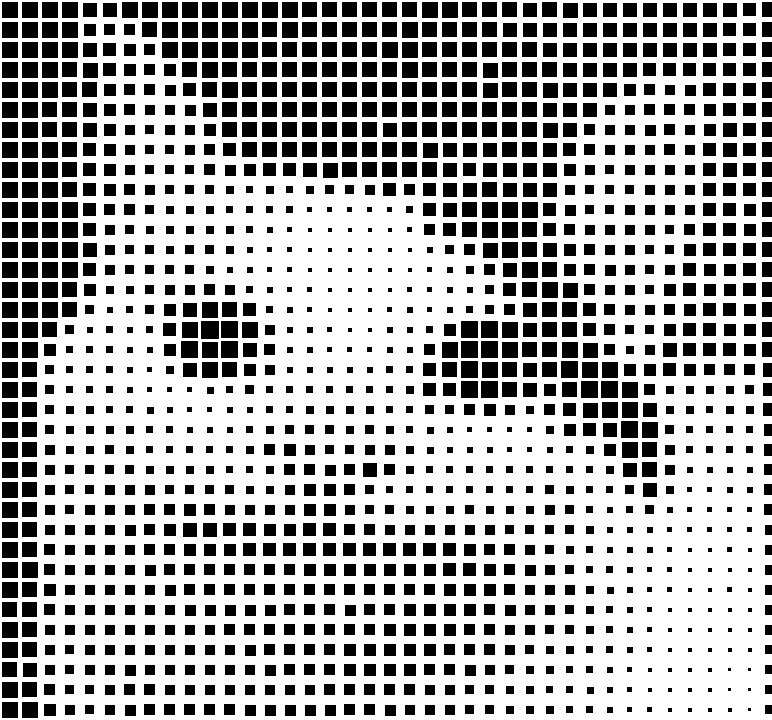

In [9]:
resetImage(img_width, img_height, "white")

for x in range(0, img_width, tile_size):
    for y in range(0, img_height, tile_size):
        x0 = x
        y0 = y
        x1 = x + tile_size
        y1 = y + tile_size
        color = avg_grey(img, (x0, y0, x1, y1))
        z = color[1]
        factor = 1 - z / 255
        x2 = x + (tile_size * factor)
        y2 = y + (tile_size * factor)
        offsetx = int((x1 - x2) / 2)
        offsety = int((y1 - y2) / 2)
        raster_draw.rectangle(
            xy=(x0 + offsetx, y0 + offsety, x2 + offsetx, y2 + offsety),
            outline="white",
            fill="black",
        )

display(raster_img)

In [10]:
def avg_color(image, box):
    area = image.crop(box)
    pixels = area.load()
    width, height = area.size
    r_total, g_total, b_total = 0, 0, 0
    num_pixels = width * height

    for y in range(height):
        for x in range(width):
            r, g, b = pixels[x, y]
            r_total += r
            g_total += g
            b_total += b

    avg_r = r_total // num_pixels
    avg_g = g_total // num_pixels
    avg_b = b_total // num_pixels

    color = (avg_r, avg_g, avg_b)

    return color

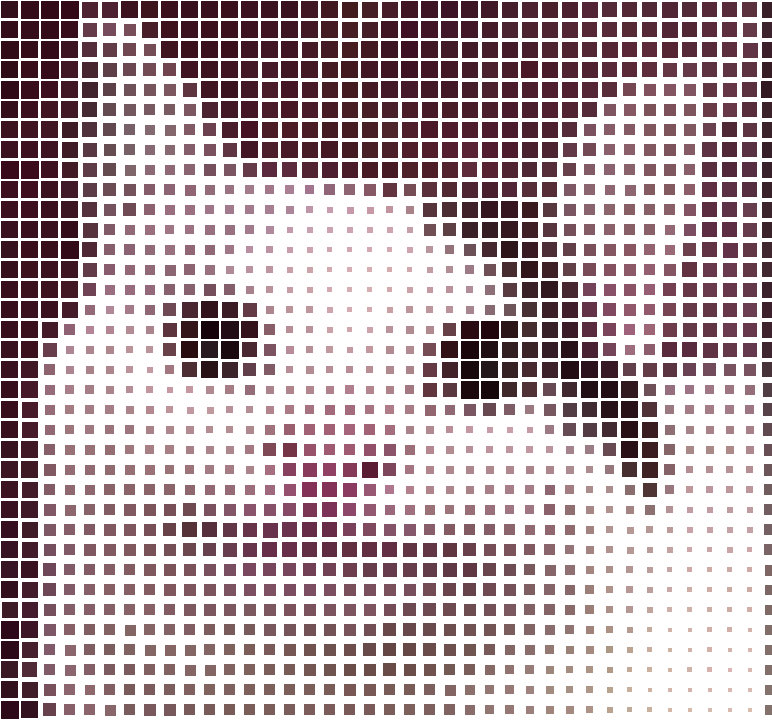

In [11]:
resetImage(img_width, img_height, "white")

for x in range(0, img_width, tile_size):
    for y in range(0, img_height, tile_size):
        x0 = x
        y0 = y
        x1 = x + tile_size
        y1 = y + tile_size
        color = avg_color(img, (x0, y0, x1, y1))
        z = color[1]
        factor = 1 - z / 255
        x2 = x + (tile_size * factor)
        y2 = y + (tile_size * factor)
        offsetx = int((x1 - x2) / 2)
        offsety = int((y1 - y2) / 2)
        raster_draw.rectangle(
            xy=(x0 + offsetx, y0 + offsety, x2 + offsetx, y2 + offsety),
            outline="white",
            width=1,
            fill=color,
        )

display(raster_img)